<a href="https://colab.research.google.com/github/Bleucroix/Inv_Op_I/blob/main/PL_Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solución de un problema de programación lineal por medio de la librería Scipy

$\underset{(x_1, x_2)}{\min} z = 4x_1+x_2 $


$sujeto$ $a:$ $$3x_1+x_2=3$$
$$4x_1+3x_2\geq6$$
$$x_1+2x_2\leq4$$
$$x_1,x_2\geq0$$





Importamos el paquete de programación lineal de la librería SciPy desde el modulo scipy.optimize

In [1]:
from scipy.optimize import linprog

Las entradas del 1-D array **c** son los coeficientes de la función a **minimizar**.

In [2]:
c = [4,1]

La i-esima entrada del 2-D array **A1** son los coeficientes de las variables de decisión en la i-ésima **desigualdad del tipo $\leq$**. En este caso como la primera desigualdad que aparece tiene un $\geq$ entonces, los coeficientes que aparecen están multiplicados por $-1$.

A esta matriz se le llama la *matriz de restrcciones de desigualdad* $A_{ub}$

In [3]:
A1 = [[-4,-3],[1,2]]

La i-ésima entrada del 1-D array **b1** es el coeficiente que aparece del lado derecho del i-ésimo $\leq$

In [4]:
b1=[-6,4]

La i-ésima entrada del 2-D array **A2** son los coeficientes de las variables de decisión en la i-ésima **igualdad**.

A esta matriz se le llama la *matriz de restricciones de igualdad* $A_{eq}$

Es importante resaltar que las matrices $A_{des}, A_{eq} \in \mathcal{M}_{m,n}(\mathbb{R})$ , es decir, tienen el mismo tamaño. Por esa razón agregamos en la segunda entrada de A2 el array `[0,0]`


In [5]:
A2=[[3,1],[0,0]]

La i-ésima entrada del 1-D array **b2** es el coeficiente que aparece del lado derecho del i-ésimo $=$



In [6]:
b2=[3,0]

`x1_bounds, x2_bounds` nos ayudan a determinar una pareja `(min,max)` para cada variable decisión.

Las entradas de dicha pareja representan el valor mínimo y máximo respectivamente que puede tomar las variables de decisión.

`None` indica que no hay límite.

In [7]:
x1_bounds=(0,None)
x2_bounds=(0,None)

La función que ocuparemos requiere que dichas parejas estén dentro de un array `bounds`, cuya i-ésima entrada será la pareja `xi_bounds` para cada `xi` variable de decisión.

In [8]:
bounds=[x1_bounds,x2_bounds]

Utilizamos la función `linprog` que minimiza resuelve un problema de programación lineal de la forma:

$$\underset{(x_1, x_2)}{\min} z = c^T x $$


sujeto a $$A_{ub} \cdot x\leq b_{ub}$$ y/o
$$A_{eq} \cdot x = b_{eq}$$

In [9]:
model_linear=linprog(c, A_ub=A1, b_ub=b1, A_eq=A2, b_eq=b2, bounds = bounds)

Imprimimos el resultado:

In [10]:
print(model_linear)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 3.4000000000000004
              x: [ 4.000e-01  1.800e+00]
            nit: 0
          lower:  residual: [ 4.000e-01  1.800e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [ 1.400e+00 -0.000e+00]
        ineqlin:  residual: [ 1.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -2.000e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


`model_linear.x` almacena el array que representa el punto óptimo.

`model_linear.fun` contiene el valor mínimo de la función objetivo en el punto óptimo.

Lo imprimimos:

In [100]:
print(model_linear.x)
print(model_linear.fun)

[0.4 1.8]
3.4000000000000004


## Solución geométrica

In [55]:
import matplotlib.pyplot as plt

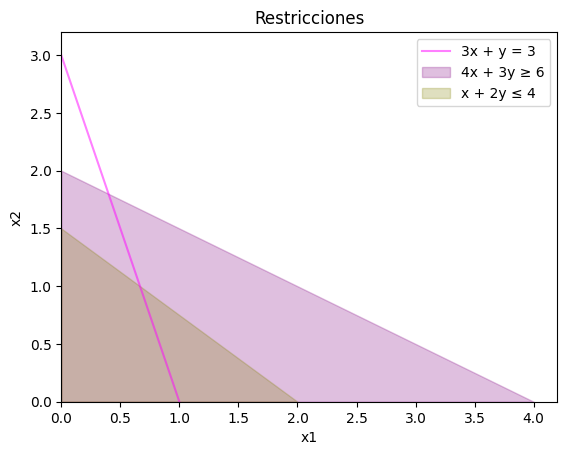

In [96]:
plt.figure()

plt.plot([0, 1], [3, 0], color="magenta", alpha=0.5, label="3x + y = 3")
plt.fill_between([0, 4], [2, 0], color="purple", alpha=0.25, label="4x + 3y ≥ 6")
plt.fill_between([0, 2], [1.5, 0], color="olive", alpha=0.25, label="x + 2y ≤ 4")

plt.xlabel('x1')
plt.ylabel('x2')

plt.legend()

plt.xlim(0, 4.2)
plt.ylim(0, 3.2)

plt.title("Restricciones")
plt.show()

Se puede ver que la región factible será un segmento de la recta $3x + y = 3$. De hecho es el segmento que conecta el punto de intersección de  $3x + y = 3$ y $4x + 3y = 6$ con el punto de intersección de $3x + y = 3$ y $x + 2y = 4$

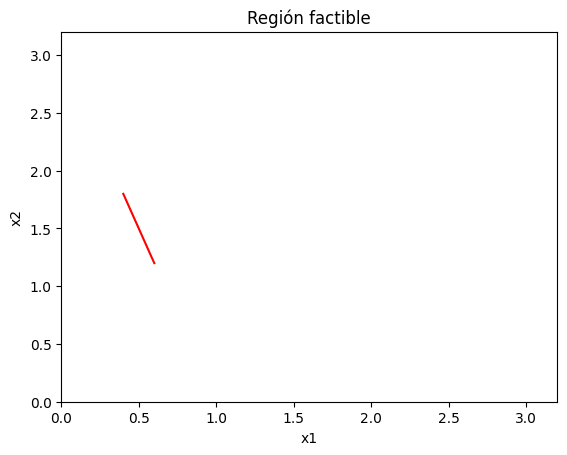

In [99]:
plt.figure()
plt.plot( [0.4, 0.6], [1.8, 1.2], color="red", alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(0,3.2)
plt.ylim(0,3.2)

plt.title("Región factible")

plt.show()

Como queremos minimizar la función, disminuimos los valores de z hasta que, la recta determinada por la función a minimizar, sale de la región factible. Vemos que el último punto que toca la recta antes de salirse es el extremo izquierdo del segmento de recta.

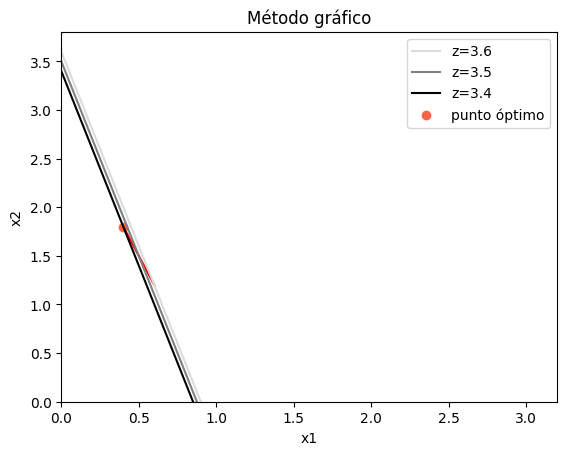

In [98]:
plt.figure()

plt.plot( [0.4, 0.6], [1.8, 1.2], color="red", alpha=1)
plt.plot( [0, 0.9], [3.6, 0], color="gainsboro", alpha=1, label="z=3.6")
plt.plot( [0, 0.875], [3.5, 0], color="grey", alpha=1, label="z=3.5")
plt.plot( [0, 0.85], [3.4, 0], color="black", alpha=1, label="z=3.4")

plt.scatter([0.4],[1.8], color="tomato", alpha=1, label="punto óptimo")

plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(0, 3.2)
plt.ylim(0, 3.8)

plt.legend()

plt.title("Método gráfico")

plt.show()

En este caso la solución es única, pese a que la región factible es una recta, pues ésta no es paralela con la recta que representa la función objetivo. Y notamos que efectivamente coincide con la solución que nos proporcionó la función `linprog`